In [3]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

import sys
sys.path.insert(1, 'utilities/')
import load_data

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
ref_mt = load_data.MannTurbData('mann_turb')
amrwind = load_data.AmrWindData('amrwind_run01')


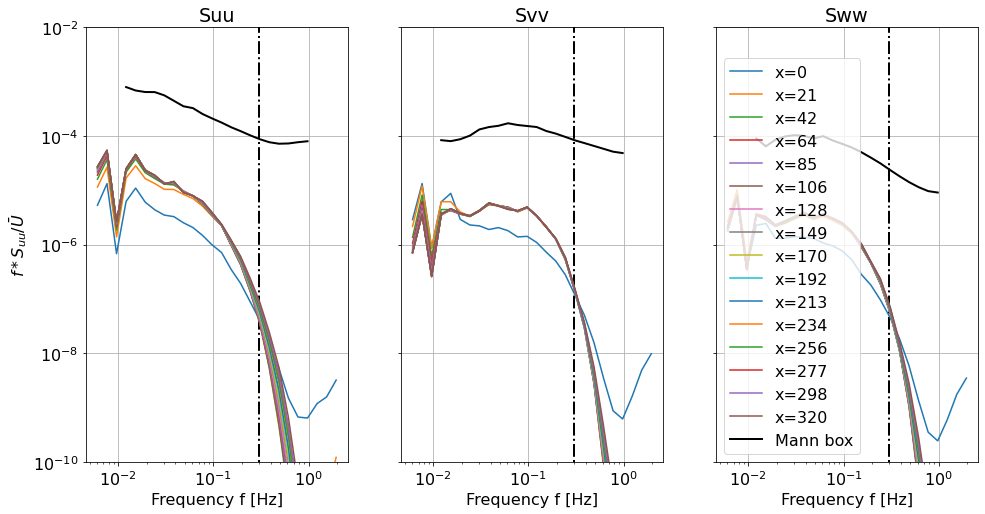

In [11]:
uavg = 10.0
nm80_dia = 80.0
deltaX     = 2.5
fmax = 0.6*uavg/(8*deltaX)

plt.rc('font', size=16)
fig, axs = plt.subplots(1,3,figsize=(16,8),sharey=True)

for i_x, x in enumerate(amrwind.xloc):
    axs[0].loglog(amrwind.f, amrwind.f * amrwind.suu[i_x,:]/uavg**2, label='x=%i'%(x * nm80_dia))
    axs[1].loglog(amrwind.f, amrwind.f * amrwind.svv[i_x,:]/uavg**2, label='x=%i'%(x * nm80_dia))
    axs[2].loglog(amrwind.f, amrwind.f * amrwind.sww[i_x,:]/uavg**2, label='x=%i'%(x * nm80_dia))

axs[0].loglog(ref_mt.f, ref_mt.f * ref_mt.suu/uavg**2, 'k', lw=2, label='Mann box')
axs[1].loglog(ref_mt.f, ref_mt.f * ref_mt.svv/uavg**2, 'k', lw=2, label='Mann box')
axs[2].loglog(ref_mt.f, ref_mt.f * ref_mt.sww/uavg**2, 'k', lw=2, label='Mann box')

axs[0].set_ylabel(r'$f*S_{uu}/\bar{U}$')
axs[0].set_title('Suu')
axs[1].set_title('Svv')
axs[2].set_title('Sww')
    
plt.legend(loc='lower left')
plt.ylim([1E-10, 1E-2])
for i in range(3): 
    axs[i].vlines(fmax, 5e-11, 20,lw=2, linestyle='-.')
    axs[i].set_xlabel('Frequency f [Hz]')
    axs[i].grid()
